# Sparkify Churn Prediction
  
__Contents:__
-  0. Set up environment
-  1. Clean Data
-  2. Exploratory Analysis
-  3. Feature Engineering
-  4. Modelling

## 0. Set up environment

In [0]:
# install us package for timezone info
!pip install us --quiet --quiet
!pip install geopandas

Requirement already satisfied: geopandas in /databricks/python3/lib/python3.8/site-packages (0.10.2)
Requirement already satisfied: fiona>=1.8 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.8.21)
Requirement already satisfied: shapely>=1.6 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.8.2)
Requirement already satisfied: pyproj>=2.2.0 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (3.3.1)
Requirement already satisfied: pandas>=0.25.0 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.2.4)
Requirement already satisfied: six>=1.7 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (1.15.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from fiona>=1.8->geopandas) (52.0.0)
Requirement already satisfied: click>=4.0 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (8.1.3)
Requirement already satisfied: certifi in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (2020.12.5)
Requirement already satisfied: munch in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (2.5.0)
Requirement already satisfied: cligj>=0.5 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (0.7.2)
Requirement already satisfied: click-plugins>=1.0 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (1.1.1)
Requirement already satisfied: attrs>=17 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (20.3.0)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.25.0->geopandas) (2020.5)
Requirement already satisfied: numpy>=1.16.5 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.25.0->geopandas) (1.19.2)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.25.0->geopandas) (2.8.1)
 WARNING: You are using pip version 21.0.1; however, version 22.1.2 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
import urllib 
urllib.request.urlretrieve("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip", "cb_2018_us_state_20m.zip")

Out[110]: ('cb_2018_us_state_20m.zip', <http.client.HTTPMessage at 0x7f0f0781dee0>)

In [0]:
%sh
mkdir tmp
unzip cb_2018_us_state_20m.zip -d /tmp/
ls -la /tmp

mkdir: cannot create directory ‘tmp’: File exists
Archive: cb_2018_us_state_20m.zip
 inflating: /tmp/cb_2018_us_state_20m.shp.ea.iso.xml 
 inflating: /tmp/cb_2018_us_state_20m.shp.iso.xml 
 inflating: /tmp/cb_2018_us_state_20m.shp 
 inflating: /tmp/cb_2018_us_state_20m.shx 
 inflating: /tmp/cb_2018_us_state_20m.dbf 
 inflating: /tmp/cb_2018_us_state_20m.prj 
 extracting: /tmp/cb_2018_us_state_20m.cpg 
total 580
drwxrwxrwt 1 root root 4096 Jun 12 18:14 .
drwxr-xr-x 1 root root 4096 Jun 12 16:12 ..
drwxrwxrwt 2 root root 4096 Jun 12 16:12 .ICE-unix
drwxrwxrwt 2 root root 4096 Jun 12 16:12 .Test-unix
drwxrwxrwt 2 root root 4096 Jun 12 16:12 .X11-unix
drwxrwxrwt 2 root root 4096 Jun 12 16:12 .XIM-unix
drwxrwxrwt 2 root root 4096 Jun 12 16:12 .font-unix
drwxr-xr-x 3 root root 4096 Jun 12 16:12 Rserv
drwx------ 2 root root 4096 Jun 12 16:12 Rtmp2YhiGD
-rw-rw---- 1 root root 5 Apr 15 2019 cb_2018_us_state_20m.cpg
-rw-rw---- 1 root root 8434 Apr 15 2019 cb_2018_us_state_20m.dbf
-rw-rw---- 1 root root 165 Apr 15 2019 cb_2018_us_state_20m.prj
-rw-rw---- 1 root root 223972 Apr 15 2019 cb_2018_us_state_20m.shp
-rwxrwxrwx 1 root root 17908 Apr 15 2019 cb_2018_us_state_20m.shp.ea.iso.xml
-rwxrwxrwx 1 root root 32994 Apr 15 2019 cb_2018_us_state_20m.shp.iso.xml
-rw-rw---- 1 root root 516 Apr 15 2019 cb_2018_us_state_20m.shx
-rw-r--r-- 1 root root 22 Jun 12 16:12 chauffeur-daemon-params
-rw-r--r-- 1 root root 4 Jun 12 16:12 chauffeur-daemon.pid
-rw-r--r-- 1 root root 156 Jun 12 16:12 chauffeur-env.sh
-rw-r--r-- 1 root root 464 Jun 12 16:12 custom-spark.conf
-rw-r--r-- 1 root root 19 Jun 12 16:12 driver-daemon-params
-rw-r--r-- 1 root root 4 Jun 12 16:12 driver-daemon.pid
-rw-r--r-- 1 root root 3280 Jun 12 16:12 driver-env.sh
drwxr-xr-x 2 root root 4096 Jun 12 16:12 hsperfdata_root
-rw-r--r-- 1 root root 18 Jun 12 16:12 master-params
-rw-r--r-- 1 root root 4 Jun 12 16:12 spark-root-org.apache.spark.deploy.master.Master-1.pid
drwx------ 3 root root 4096 Jun 12 16:12 systemd-private-c416a6b5820e41ddb24ce24a82c899e7-apache2.service-2UKs9h
drwx------ 3 root root 4096 Jun 12 16:12 systemd-private-c416a6b5820e41ddb24ce24a82c899e7-ntp.service-4vYa5i
drwx------ 3 root root 4096 Jun 12 16:12 systemd-private-c416a6b5820e41ddb24ce24a82c899e7-systemd-logind.service-ep4b6g
drwx------ 3 root root 4096 Jun 12 16:12 systemd-private-c416a6b5820e41ddb24ce24a82c899e7-systemd-resolved.service-WYNaFf
-rw------- 1 root root 0 Jun 12 16:12 tmp.0BMpikbyPR
-rw-r--r-- 1 root root 191218 Jun 12 18:02 us_states.zip

In [0]:
%sh
unzip --help

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
 Default action is to extract files in list, except those in xlist, to exdir;
 file[.zip] may be a wildcard. -Z => ZipInfo mode ("unzip -Z" for usage).

 -p extract files to pipe, no messages -l list files (short format)
 -f freshen existing files, create none -t test compressed archive data
 -u update files, create if necessary -z display archive comment only
 -v list verbosely/show version info -T timestamp archive to latest
 -x exclude files that follow (in xlist) -d extract files into exdir
modifiers:
 -n never overwrite existing files -q quiet mode (-qq => quieter)
 -o overwrite files WITHOUT prompting -a auto-convert any text files
 -j junk paths (do not make directories) -aa treat ALL files as text
 -U use escapes for all non-ASCII Unicode -UU ignore any Unicode fields
 -C match filenames case-insensitively -L make (some) names lowercase
 -X restore UID/GID info -V retain VMS version numbers
 -K keep setuid/setgid/tacky permissions -M pipe through "more" pager
 -O CHARSET specify a character encoding for DOS, Windows and OS/2 archives
 -I CHARSET specify a character encoding for UNIX and other archives

See "unzip -hh" or unzip.txt for more help. Examples:
 unzip data1 -x joe => extract all files except joe from zipfile data1.zip
 unzip -p foo | more => send contents of foo.zip via pipe into program more
 unzip -fo foo ReadMe => quietly replace existing ReadMe if archive file newer

In [0]:
%fs ls '/Users/1045025@imptobnet.com/0_Learning/'

at shaded.databricks.org.apache.hadoop.fs.azure.NativeAzureFileSystem.listStatus(NativeAzureFileSystem.java:2493)
	at com.databricks.backend.daemon.data.client.DBFSV2.$anonfun$listStatus$2(DatabricksFileSystemV2.scala:95)
	at com.databricks.s3a.S3AExceptionUtils$.convertAWSExceptionToJavaIOException(DatabricksStreamUtils.scala:66)
	at com.databricks.backend.daemon.data.client.DBFSV2.$anonfun$listStatus$1(DatabricksFileSystemV2.scala:92)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:395)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:484)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:504)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:266)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:261)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:258)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.withAttributionContext(DatabricksFileSystemV2.scala:510)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:305)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:297)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.withAttributionTags(DatabricksFileSystemV2.scala:510)
	at com.databricks.logging.UsageLogging.recordOperationWithResultTags(UsageLogging.scala:479)
	at com.databricks.logging.UsageLogging.recordOperationWithResultTags$(UsageLogging.scala:404)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.recordOperationWithResultTags(DatabricksFileSystemV2.scala:510)
	at com.databricks.logging.UsageLogging.recordOperation(UsageLogging.scala:395)
	at com.databricks.logging.UsageLogging.recordOperation$(UsageLogging.scala:367)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.recordOperation(DatabricksFileSystemV2.scala:510)
	at com.databricks.backend.daemon.data.client.DBFSV2.listStatus(DatabricksFileSystemV2.scala:92)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileSystem.scala:150)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$ls$1(DBUtilsCore.scala:154)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withFsSafetyCheck(DBUtilsCore.scala:91)
	at com.databricks.backend.daemon.dbutils.FSUtils$.ls(DBUtilsCore.scala:153)
	at com.databricks.dbutils_v1.impl.DbfsUtilsImpl.ls(DbfsUtilsImpl.scala:63)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$$iw$$iw$$iw$$iw$$iw$$iw.<init>(command-2557303712483905:1)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$$iw$$iw$$iw$$iw$$iw.<init>(command-2557303712483905:43)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$$iw$$iw$$iw$$iw.<init>(command-2557303712483905:45)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$$iw$$iw$$iw.<init>(command-2557303712483905:47)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$$iw$$iw.<init>(command-2557303712483905:49)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$$iw.<init>(command-2557303712483905:51)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read.<init>(command-2557303712483905:53)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$.<init>(command-2557303712483905:57)
	at $line1b13d1bab97840dda6b0fc75827addef37.$read$.<clinit>(command-2557303712483905)
	at $line1b13d1bab97840dda6b0fc75827addef37.$eval$.$print$lzycompute(<notebook>:7)
	at $line1b13d1bab97840dda6b0fc75827addef37.$eval$.$print(<notebook>:6)
	at $line1b13d1bab97840dda6b0fc75827addef37.$eval.$print(<notebook>)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java

In [0]:
# Import libraries
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf, isnan, count, when, substring, from_unixtime, from_utc_timestamp #, otherwise

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import CountVectorizer, IDF, Normalizer, PCA, RegexTokenizer, StandardScaler, StopWordsRemover, StringIndexer, VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import us as us_st
# from pytz import timezone
from dateutil import tz

In [0]:
# Create spark session
spark = SparkSession.builder.appName("Churn Prdiction").getOrCreate()

In [0]:
# Configuration:
spark.sparkContext #.getConf() #.getAll()

Out[4]:

SparkContext 

 Spark UI 

 
 Version 
 v3.1.2 
 Master 
 spark://10.139.64.5:7077 
 AppName 
 Databricks Shell

## 1. Load and Clean Data

In [0]:
# df = spark.read.json('s3://udacity-dsnd/sparkify/sparkify_event_data.json')

# Read up mini data
df = spark.read.json('s3://udacity-dsnd/sparkify/mini_sparkify_event_data.json')
df.persist()

# look at the top 5 rows
df.show(5)

+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
 artist| auth|firstName|gender|itemInSession|lastName| length|level| location|method| page| registration|sessionId| song|status| ts| userAgent|userId|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
 Martha Tilston|Logged In| Colin| M| 50| Freeman|277.89016| paid| Bakersfield, CA| PUT|NextSong|1538173362000| 29| Rockpools| 200|1538352117000|Mozilla/5.0 (Wind...| 30|
Five Iron Frenzy|Logged In| Micah| M| 79| Long|236.09424| free|Boston-Cambridge-...| PUT|NextSong|1538331630000| 8| Canada| 200|1538352180000|"Mozilla/5.0 (Win...| 9|
 Adam Lambert|Logged In| Colin| M| 51| Freeman| 282.8273| paid| Bakersfield, CA| PUT|NextSong|1538173362000| 29| Time For Miracles| 200|1538352394000|Mozilla/5.0 (Wind...| 30|
 Enigma|Logged In| Micah| M| 80| Long|262.71302| free|Boston-Cambridge-...| PUT|NextSong|1538331630000| 8|Knocking On Forbi...| 200|1538352416000|"Mozilla/5.0 (Win...| 9|
 Daft Punk|Logged In| Colin| M| 52| Freeman|223.60771| paid| Bakersfield, CA| PUT|NextSong|1538173362000| 29|Harder Better Fas...| 200|1538352676000|Mozilla/5.0 (Wind...| 30|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
only showing top 5 rows

In [0]:
# Have a look at the column names and data types (schema)
df.printSchema()

root
-- artist: string (nullable = true)
-- auth: string (nullable = true)
-- firstName: string (nullable = true)
-- gender: string (nullable = true)
-- itemInSession: long (nullable = true)
-- lastName: string (nullable = true)
-- length: double (nullable = true)
-- level: string (nullable = true)
-- location: string (nullable = true)
-- method: string (nullable = true)
-- page: string (nullable = true)
-- registration: long (nullable = true)
-- sessionId: long (nullable = true)
-- song: string (nullable = true)
-- status: long (nullable = true)
-- ts: long (nullable = true)
-- userAgent: string (nullable = true)
-- userId: string (nullable = true)

In [0]:
# Get number of rows in dataframe
df.count()

Out[7]: 286500

In [0]:
# look at high level description of the data
df.describe().toPandas()

Out[8]:

,summary,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,count,228108,286500,278154,278154,286500,278154,228108,286500,278154,286500,286500,278154,286500,228108,286500,286500,278154,286500
1,mean,551.0852017937219,None,None,None,114.41421291448516,None,249.11718197783583,None,None,None,None,1.5353588340856191E12,1041.526554973822,Infinity,210.05459685863875,1.5409568898103945E12,None,59682.02278593872
2,stddev,1217.7693079161377,None,None,None,129.7672620114106,None,99.23517921058313,None,None,None,None,3.2913216163281236E9,726.7762634630807,NaN,31.505078488421987,1.50754396082106E9,None,109091.94999910559
3,min,!!!,Cancelled,Adelaida,F,0,Adams,0.78322,free,"Albany, OR",GET,About,1521380675000,1,ÃÂg ÃÂtti GrÃÂ¡a ÃÂsku,200,1538352117000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10)...",
4,max,ÃÂlafur Arnalds,Logged Out,Zyonna,M,1321,Wright,3024.66567,paid,"Winston-Salem, NC",PUT,Upgrade,1543247354000,2474,ÃÂau hafa sloppiÃÂ° undan ÃÂ¾unga myrkursins,404,1543799476000,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,99


In [0]:
# Count of null values by column
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId| song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
 58392| 0| 8346| 8346| 0| 8346| 58392| 0| 8346| 0| 0| 8346| 0|58392| 0| 0| 8346| 0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+

There are a number of rows with no `firstName`, `lastName`, `gender`, or `location`. Let's look at these a bit closer

In [0]:
df.where(isnan(df.firstName) | df.firstName.isNull()).show()

+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+------+
artist| auth|firstName|gender|itemInSession|lastName|length|level|location|method| page|registration|sessionId|song|status| ts|userAgent|userId|
+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+------+
 null|Logged Out| null| null| 100| null| null| free| null| GET| Home| null| 8|null| 200|1538355745000| null| |
 null|Logged Out| null| null| 101| null| null| free| null| GET| Help| null| 8|null| 200|1538355807000| null| |
 null|Logged Out| null| null| 102| null| null| free| null| GET| Home| null| 8|null| 200|1538355841000| null| |
 null|Logged Out| null| null| 103| null| null| free| null| PUT|Login| null| 8|null| 307|1538355842000| null| |
 null|Logged Out| null| null| 2| null| null| free| null| GET| Home| null| 240|null| 200|1538356678000| null| |
 null|Logged Out| null| null| 3| null| null| free| null| PUT|Login| null| 240|null| 307|1538356679000| null| |
 null|Logged Out| null| null| 0| null| null| free| null| PUT|Login| null| 100|null| 307|1538358102000| null| |
 null|Logged Out| null| null| 0| null| null| free| null| PUT|Login| null| 241|null| 307|1538360117000| null| |
 null|Logged Out| null| null| 14| null| null| free| null| GET| Home| null| 187|null| 200|1538361527000| null| |
 null|Logged Out| null| null| 15| null| null| free| null| PUT|Login| null| 187|null| 307|1538361528000| null| |
 null|Logged Out| null| null| 21| null| null| free| null| GET| Home| null| 187|null| 200|1538362007000| null| |
 null|Logged Out| null| null| 22| null| null| free| null| GET| Home| null| 187|null| 200|1538362095000| null| |
 null|Logged Out| null| null| 23| null| null| free| null| PUT|Login| null| 187|null| 307|1538362096000| null| |
 null|Logged Out| null| null| 0| null| null| free| null| GET| Home| null| 27|null| 200|1538363488000| null| |
 null|Logged Out| null| null| 1| null| null| free| null| GET|About| null| 27|null| 200|1538363494000| null| |
 null|Logged Out| null| null| 2| null| null| free| null| GET| Home| null| 27|null| 200|1538363503000| null| |
 null|Logged Out| null| null| 38| null| null| free| null| GET| Home| null| 187|null| 200|1538364254000| null| |
 null|Logged Out| null| null| 39| null| null| free| null| PUT|Login| null| 187|null| 307|1538364255000| null| |
 null|Logged Out| null| null| 0| null| null| free| null| GET| Home| null| 257|null| 200|1538364750000| null| |
 null|Logged Out| null| null| 47| null| null| free| null| GET| Home| null| 100|null| 200|1538370681000| null| |
+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+------+
only showing top 20 rows

In [0]:
# Let's see what is the auth for users with no name
df.where(isnan(df.firstName) | df.firstName.isNull() | isnan(df.lastName) | df.lastName.isNull()).select(col('auth')).dropDuplicates().show()

+----------+
 auth|
+----------+
Logged Out|
 Guest|
+----------+

In [0]:
# Let's see what pages were visited by users with no name
df.where(isnan(df.firstName) | df.firstName.isNull() | isnan(df.lastName) | df.lastName.isNull()).select(col('page')).groupBy('page').count().sort('count').show()

+-------------------+-----+
 page|count|
+-------------------+-----+
Submit Registration| 5|
 Error| 6|
 Register| 18|
 Help| 272|
 About| 429|
 Login| 3241|
 Home| 4375|
+-------------------+-----+

In [0]:
# is there any userId associated to users with no name?
df.where(isnan(df.firstName) | df.firstName.isNull() | isnan(df.lastName) | df.lastName.isNull()).select(col('userId')).dropDuplicates().show()

+------+
userId|
+------+
 |
+------+

User activities with no `firstName ` or `lastName` look like have no userId, authentication is either `Logged Out` or `Guest` and has no `userId`.  
Let's drop these activities, they are likely to be users just before logging in or new users browsing for help before registering.

In [0]:
df = df.where(~(isnan(df.firstName) | df.firstName.isNull() | isnan(df.lastName) | df.lastName.isNull()))

In [0]:
df.show(3)

+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+-----------------+------+-------------+--------------------+------+
 artist| auth|firstName|gender|itemInSession|lastName| length|level| location|method| page| registration|sessionId| song|status| ts| userAgent|userId|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+-----------------+------+-------------+--------------------+------+
 Martha Tilston|Logged In| Colin| M| 50| Freeman|277.89016| paid| Bakersfield, CA| PUT|NextSong|1538173362000| 29| Rockpools| 200|1538352117000|Mozilla/5.0 (Wind...| 30|
Five Iron Frenzy|Logged In| Micah| M| 79| Long|236.09424| free|Boston-Cambridge-...| PUT|NextSong|1538331630000| 8| Canada| 200|1538352180000|"Mozilla/5.0 (Win...| 9|
 Adam Lambert|Logged In| Colin| M| 51| Freeman| 282.8273| paid| Bakersfield, CA| PUT|NextSong|1538173362000| 29|Time For Miracles| 200|1538352394000|Mozilla/5.0 (Wind...| 30|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+-----------------+------+-------------+--------------------+------+
only showing top 3 rows

In [0]:
# let's look at a single user
df.filter(col('userId')=='30').sort('ts').show()

+--------------------+---------+---------+------+-------------+--------+---------+-----+---------------+------+---------------+-------------+---------+--------------------+------+-------------+--------------------+------+
 artist| auth|firstName|gender|itemInSession|lastName| length|level| location|method| page| registration|sessionId| song|status| ts| userAgent|userId|
+--------------------+---------+---------+------+-------------+--------+---------+-----+---------------+------+---------------+-------------+---------+--------------------+------+-------------+--------------------+------+
 Martha Tilston|Logged In| Colin| M| 50| Freeman|277.89016| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Rockpools| 200|1538352117000|Mozilla/5.0 (Wind...| 30|
 Adam Lambert|Logged In| Colin| M| 51| Freeman| 282.8273| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Time For Miracles| 200|1538352394000|Mozilla/5.0 (Wind...| 30|
 Daft Punk|Logged In| Colin| M| 52| Freeman|223.60771| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29|Harder Better Fas...| 200|1538352676000|Mozilla/5.0 (Wind...| 30|
 Starflyer 59|Logged In| Colin| M| 53| Freeman|185.44281| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29|Passengers (Old A...| 200|1538352899000|Mozilla/5.0 (Wind...| 30|
 null|Logged In| Colin| M| 54| Freeman| null| paid|Bakersfield, CA| PUT|Add to Playlist|1538173362000| 29| null| 200|1538352905000|Mozilla/5.0 (Wind...| 30|
 Frumpies|Logged In| Colin| M| 55| Freeman|134.47791| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Fuck Kitty| 200|1538353084000|Mozilla/5.0 (Wind...| 30|
Edward Sharpe & T...|Logged In| Colin| M| 56| Freeman|223.58159| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Jade| 200|1538353218000|Mozilla/5.0 (Wind...| 30|
 Stan Mosley|Logged In| Colin| M| 57| Freeman|246.69995| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| So-Called Friends| 200|1538353441000|Mozilla/5.0 (Wind...| 30|
 Orishas|Logged In| Colin| M| 58| Freeman|222.22322| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Represent| 200|1538353687000|Mozilla/5.0 (Wind...| 30|
 Downhere|Logged In| Colin| M| 59| Freeman|223.92118| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Here I Am| 200|1538353909000|Mozilla/5.0 (Wind...| 30|
 Skillet|Logged In| Colin| M| 60| Freeman|233.32526| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29|Rebirthing (Album...| 200|1538354132000|Mozilla/5.0 (Wind...| 30|
Florence + The Ma...|Logged In| Colin| M| 61| Freeman|219.66322| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29|Dog Days Are Over...| 200|1538354365000|Mozilla/5.0 (Wind...| 30|
 Nick Drake|Logged In| Colin| M| 62| Freeman|222.92853| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29|Tomorrow Is A Lon...| 200|1538354584000|Mozilla/5.0 (Wind...| 30|
Lambert_ Hendrick...|Logged In| Colin| M| 63| Freeman|139.04934| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Halloween Spooks| 200|1538354806000|Mozilla/5.0 (Wind...| 30|
 Kanye West|Logged In| Colin| M| 64| Freeman|311.84934| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Stronger| 200|1538354945000|Mozilla/5.0 (Wind...| 30|
 Redman / Ready Roc|Logged In| Colin| M| 65| Freeman|217.91302| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Dis Iz Brick City| 200|1538355256000|Mozilla/5.0 (Wind...| 30|
The All-American ...|Logged In| Colin| M| 66| Freeman|238.86322| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Move Along| 200|1538355473000|Mozilla/5.0 (Wind...| 30|
 Kings Of Leon|Logged In| Colin| M| 67| Freeman| 204.2771| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Manhattan| 200|1538355711000|Mozilla/5.0 (Wind...| 30|
 BjÃÂ¶rk|Logged In| Colin| M| 68| Freeman|348.57751| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| Undo| 200|1538355915000|Mozilla/5.0 (Wind...| 30|
 The Prodigy|Logged In| Colin| M| 69| Freeman|260.07465| paid|Bakersfield, CA| PUT| NextSong|1538173362000| 29| The Big Gundown| 200|153835626300

In [0]:
# Number of users
df.select(col('userId')).dropDuplicates().count()

Out[17]: 225

In [0]:
# look at the events and their counts
df.groupBy('page').count().sort('count').show(20, False)

+-------------------------+------+
page |count |
+-------------------------+------+
Cancel |52 |
Cancellation Confirmation|52 |
Submit Downgrade |63 |
Submit Upgrade |159 |
Error |252 |
Save Settings |310 |
About |495 |
Upgrade |499 |
Help |1454 |
Settings |1514 |
Downgrade |2055 |
Thumbs Down |2546 |
Logout |3226 |
Roll Advert |3933 |
Add Friend |4277 |
Add to Playlist |6526 |
Home |10082 |
Thumbs Up |12551 |
NextSong |228108|
+-------------------------+------+

### Churn vs no-churn
__Define churn:__  
Churn means the number of users leaving the service by cancellation.  
From a data perspective churn is marked by when user visits `'Cancellation Confirmation'`.  
From Analytics and Modelling perspecive there are multiple ways to approach churn:  
- Activity level: Each page visit considered to be an individual choice or decision. I.e: is the user going to listen to another song, downgrade, give a thumbs up, etc.
  In this case the model and its prediction would take activity level inputs, even if som is based on prior activities and experiences during a window or accumulatively.  
  Every cancellation activity will be considered individually as churned based on activities visiting `'Cancel'` page and before that the `'Cancellation Confirmation'` page.  
  In this case a row will represent a singel activity by a single user and prediction will focus on whether it'll be a cancellation page visit or not.
- Session Level: In this approach we consider the whole session to be churn or nut churn.  
  In this case a row will represent a singel session of a single user with aggregate attributes calculated through either a period or accumulatively since registering.
- User level: This approach extends the attribution of 'churning' to the user and considers each user as either churning or not churning.  
  In this case every row will be a user with aggregate attributes calculated through either a window period or accumulatively since registering

In [0]:
df.filter(col('page')=='Cancellation Confirmation').sort(col('userId')).show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+--------------------+-------------+---------+----+------+-------------+--------------------+------+
artist| auth|firstName|gender|itemInSession|lastName|length|level| location|method| page| registration|sessionId|song|status| ts| userAgent|userId|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+--------------------+-------------+---------+----+------+-------------+--------------------+------+
 null|Cancelled| Delaney| F| 23| Perez| null| free|Miami-Fort Lauder...| GET|Cancellation Conf...|1534627466000| 53|null| 200|1538498205000|"Mozilla/5.0 (Mac...|100001|
 null|Cancelled| Nevaeh| F| 81| Jones| null| free|Miami-Fort Lauder...| GET|Cancellation Conf...|1537309344000| 86|null| 200|1539274781000|Mozilla/5.0 (Wind...|100003|
 null|Cancelled| Cason| M| 73| Smith| null| free| Monroe, LA| GET|Cancellation Conf...|1532610926000| 115|null| 200|1539971825000|"Mozilla/5.0 (Mac...|100005|
 null|Cancelled| Leyla| F| 45| Barnes| null| free| Flint, MI| GET|Cancellation Conf...|1537964483000| 6|null| 200|1538753070000|"Mozilla/5.0 (Win...|100006|
 null|Cancelled| Piper| F| 201| Cook| null| paid|Little Rock-North...| GET|Cancellation Conf...|1533522419000| 205|null| 200|1543491909000|"Mozilla/5.0 (Win...|100007|
 null|Cancelled| Troy| M| 61| Mathis| null| free|San Francisco-Oak...| GET|Cancellation Conf...|1537376437000| 145|null| 200|1540611104000|"Mozilla/5.0 (Win...|100009|
 null|Cancelled|Sebastian| M| 22| Ball| null| free| Albany, OR| GET|Cancellation Conf...|1537970819000| 40|null| 200|1538417085000|Mozilla/5.0 (Wind...|100011|
 null|Cancelled| Daniel| M| 74| Marks| null| free|Chicago-Napervill...| GET|Cancellation Conf...|1537381154000| 156|null| 200|1541100900000|"Mozilla/5.0 (Mac...|100012|
 null|Cancelled| Cali| F| 51| Brown| null| paid|Cleveland-Elyria, OH| GET|Cancellation Conf...|1537367773000| 165|null| 200|1541184816000|"Mozilla/5.0 (Win...|100013|
 null|Cancelled| Rodrigo| M| 73| Carey| null| paid|New York-Newark-J...| GET|Cancellation Conf...|1535389443000| 185|null| 200|1542740649000|"Mozilla/5.0 (Win...|100014|
 null|Cancelled| Tina| F| 115|Thompson| null| paid|North Wilkesboro, NC| GET|Cancellation Conf...|1537208989000| 188|null| 200|1543073753000|"Mozilla/5.0 (Mac...|100015|
 null|Cancelled| James| M| 74| Mann| null| free|Birmingham-Hoover...| GET|Cancellation Conf...|1533247234000| 17|null| 200|1540062847000|"Mozilla/5.0 (iPh...|100017|
 null|Cancelled| Angel| M| 65| Jacobs| null| free|Spokane-Spokane V...| GET|Cancellation Conf...|1536257455000| 71|null| 200|1538953071000|Mozilla/5.0 (X11;...|100019|
 null|Cancelled| Rayden| M| 185|Phillips| null| free|Dallas-Fort Worth...| GET|Cancellation Conf...|1537550344000| 172|null| 200|1543143782000|"Mozilla/5.0 (Mac...|100021|
 null|Cancelled| Mahi| F| 17|Robinson| null| free|Houston-The Woodl...| GET|Cancellation Conf...|1537898335000| 191|null| 200|1542038645000|Mozilla/5.0 (Maci...|100022|
 null|Cancelled| Sawyer| M| 18| Nelson| null| paid|Greenville-Anders...| GET|Cancellation Conf...|1536679150000| 109|null| 200|1539475237000|"Mozilla/5.0 (Win...|100023|
 null|Cancelled| Jonathon| M| 36| Miller| null| free|New York-Newark-J...| GET|Cancellation Conf...|1536343087000| 42|null| 200|1538695038000|Mozilla/5.0 (Wind...|100024|
 null|Cancelled| London| F| 49| Diaz| null| free|New York-Newark-J...| GET|Cancellation Conf...|1532625569000| 129|null| 200|1540299152000|"Mozilla/5.0 (Mac...|100025|
 null|Cancelled| Alex| M| 145| Hogan| null| paid|Denver-Aurora-Lak...| GET|Cancellation Conf...|1535066380000| 842|null| 200|1539729037000|Mozilla/5.0 (Wind...| 101|
 null|Cancelled| Piper| F| 8| Nielsen| null| paid|New York-Newark-J...| GET|Cancellation Conf...|1537699856000| 1583|null| 200|1541340091000|"Mozilla/5.0 (Mac...| 103|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+------------

In [0]:
# Explore a churning users activity
df.where(col('userId')=='101').sort(col('ts').desc()).show(80)

+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------------------+-------------+---------+--------------------+------+-------------+--------------------+------+
 artist| auth|firstName|gender|itemInSession|lastName| length|level| location|method| page| registration|sessionId| song|status| ts| userAgent|userId|
+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------------------+-------------+---------+--------------------+------+-------------+--------------------+------+
 null|Cancelled| Alex| M| 145| Hogan| null| paid|Denver-Aurora-Lak...| GET|Cancellation Conf...|1535066380000| 842| null| 200|1539729037000|Mozilla/5.0 (Wind...| 101|
 null|Logged In| Alex| M| 144| Hogan| null| paid|Denver-Aurora-Lak...| PUT| Cancel|1535066380000| 842| null| 307|1539728810000|Mozilla/5.0 (Wind...| 101|
 null|Logged In| Alex| M| 143| Hogan| null| paid|Denver-Aurora-Lak...| GET| Downgrade|1535066380000| 842| null| 200|1539728809000|Mozilla/5.0 (Wind...| 101|
 Soltero|Logged In| Alex| M| 142| Hogan|182.12526| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Songs Of The Season| 200|1539728789000|Mozilla/5.0 (Wind...| 101|
 Lil Wayne / Eminem|Logged In| Alex| M| 141| Hogan|229.58975| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Drop The World| 200|1539728560000|Mozilla/5.0 (Wind...| 101|
 Free|Logged In| Alex| M| 140| Hogan|168.59383| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Soldier Boy| 200|1539728392000|Mozilla/5.0 (Wind...| 101|
Jersey Boys - The...|Logged In| Alex| M| 139| Hogan|104.61995| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Backup Sessions| 200|1539728288000|Mozilla/5.0 (Wind...| 101|
Cheryl Cole / wil...|Logged In| Alex| M| 138| Hogan|276.47955| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Heaven| 200|1539728012000|Mozilla/5.0 (Wind...| 101|
 Jay Tee|Logged In| Alex| M| 137| Hogan|293.98159| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Won't Be Long| 200|1539727719000|Mozilla/5.0 (Wind...| 101|
 Rilo Kiley|Logged In| Alex| M| 136| Hogan|215.64036| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842|Silver Lining (Al...| 200|1539727504000|Mozilla/5.0 (Wind...| 101|
Emil Gilels/Orche...|Logged In| Alex| M| 135| Hogan|375.19628| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842|Piano Concerto No...| 200|1539727129000|Mozilla/5.0 (Wind...| 101|
 The Ronettes|Logged In| Alex| M| 134| Hogan|159.76444| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Be My Baby| 200|1539726970000|Mozilla/5.0 (Wind...| 101|
 null|Logged In| Alex| M| 133| Hogan| null| paid|Denver-Aurora-Lak...| GET| Home|1535066380000| 842| null| 200|1539726873000|Mozilla/5.0 (Wind...| 101|
 The Morning Benders|Logged In| Alex| M| 132| Hogan|225.93261| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Hand Me Downs| 200|1539726745000|Mozilla/5.0 (Wind...| 101|
 Gaudi|Logged In| Alex| M| 131| Hogan|343.24853| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842|...And The Earth ...| 200|1539726402000|Mozilla/5.0 (Wind...| 101|
 Marnie Stern|Logged In| Alex| M| 130| Hogan| 232.6722| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Ruler| 200|1539726170000|Mozilla/5.0 (Wind...| 101|
 Floetry|Logged In| Alex| M| 129| Hogan|302.31465| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842| Feelings| 200|1539725868000|Mozilla/5.0 (Wind...| 101|
 Justin Timberlake|Logged In| Alex| M| 128| Hogan| 277.9424| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842|LoveStoned/I Thin...| 200|1539725591000|Mozilla/5.0 (Wind...| 101|
 The Ruts|Logged In| Alex| M| 127| Hogan|338.96444| paid|Denver-Aurora-Lak...| PUT| NextSong|1535066380000| 842|West One (Shine O...| 200|1539725253000|Mozilla/5.0 (Wind...| 101|
 Metric|Logged In| Alex| M| 126| Hogan|245.52444| paid|Denver-Aurora-Lak...| PUT| N

User `'101'` has listened to a song from _Soltero_ then visited the `'Downgrade'` page. After this they went to the `'Cancel'` page, then finally landed at the `'Cancellation Confirmation'` page.

In [0]:
get_churn = udf(lambda x: 1 if x=='Cancellation Confirmation' else 0, IntegerType())

# Get where cancellation is confirmed
df = df.withColumn('cancel_conf', get_churn(col('page')))
df_cancel_conf = df.filter(col('cancel_conf')==1).select(['userId', 'sessionId', 'cancel_conf'])

# Add navigating to the cancel page prior to this
df = df.withColumn('churn_activity', when((col('userId').isin(df_cancel_conf.userId)) & ((col('page')=='Cancel') | (col('cancel_conf')==1)), 1).otherwise(0))

# Add session churn indicator column: 1 is churn in given session, 0 no churn
df = df.join(df_cancel_conf.withColumnRenamed('cancel_conf', 'churn_session'), on=['userId', 'sessionId'], how='left').na.fill(value=0, subset='churn_session')

# Cancellation activities
df.groupBy('churn_activity').count().show()

+--------------+------+
churn_activity| count|
+--------------+------+
 1| 104|
 0|278050|
+--------------+------+

In [0]:
# Cancellation sessions
df_session = df.groupBy(['userId', 'sessionId']).max('churn_session').sort('userId', 'sessionId') 
df_session.groupBy('max(churn_session)').count().show()

+------------------+-----+
max(churn_session)|count|
+------------------+-----+
 1| 52|
 0| 3124|
+------------------+-----+

In [0]:
# User level churning
df_user = df.groupBy('userId').max('churn_session').sort('userId') 
df_user.groupBy('max(churn_session)').count().show()

+------------------+-----+
max(churn_session)|count|
+------------------+-----+
 1| 52|
 0| 173|
+------------------+-----+

## EDA  
## Exploratory Data Exploration

- Some visuals against it
  - by gender
  - number of days since sign up before churn
  
Let's transform and process some of the columns to potentially more meaningful attributes so they can be included in the exploratory analysis:
- extract the US State and get get the correspoonding timezone name
- using above convert ts from unix time (ms) to local date and time
- etc
  
  
Explore:
- User level
  - time from registration in hours
  - Number of sessions before churning
  - gender churn vs no churn
  - State - check if a user travelled perhaps?
  

- Session level
  - Number of sessions before churning
  - Number of songs in session
  - number of thumbs up in session
  - total number of thumbs ups
  - Number of friends in session
  - total number of friends
  - device 
  
- Activity level:

In [0]:
# Get State and a column with Local datetime

# Extract the State
df = df.withColumn('state', substring(col("location"), -2, 2))

# unique list of states
df_states = df.select('state').dropDuplicates().sort('state').toPandas()
print(df_states.head(2), '\n')

# Get timezone name
df_states['tzName'] = df_states['state'].apply(lambda x: us_st.states.lookup(x).capital_tz)
print(df_states.head(2), '\n')

df_states = spark.createDataFrame(df_states)
print(df_states.show(2), '\n')

# Join time zone name
df = df.join(df_states, on='state', how='left')

# Convert utc timestamp (ms) to local date time
def get_local_datetime(ts, state):
    return datetime.datetime.utcfromtimestamp(ts/1000).astimezone(tz.gettz(state)).strftime('%Y-%m-%d %H:%M:%S')

get_tz_datetime = udf(get_local_datetime, StringType())

df = df.withColumn('dateTimeLocalTZ', get_tz_datetime(col('ts'), col('tzName')))
df.show(5)

state
0 AK
1 AL 

 state tzName
0 AK America/Anchorage
1 AL America/Chicago 

+-----+-----------------+
state| tzName|
+-----+-----------------+
 AK|America/Anchorage|
 AL| America/Chicago|
+-----+-----------------+
only showing top 2 rows

None 

+-----+------+---------+--------------------+---------+---------+------+-------------+--------+--------+-----+--------------------+------+--------+-------------+--------------------+------+-------------+--------------------+-----------+--------------+-------------+---------------+-------------------+
state|userId|sessionId| artist| auth|firstName|gender|itemInSession|lastName| length|level| location|method| page| registration| song|status| ts| userAgent|cancel_conf|churn_activity|churn_session| tzName| dateTimeLocalTZ|
+-----+------+---------+--------------------+---------+---------+------+-------------+--------+--------+-----+--------------------+------+--------+-------------+--------------------+------+-------------+--------------------+-----------+--------------+-------------+---------------+-------------------+
 AZ| 95| 1086| null|Logged In| Faigy| F| 0| Howe| null| free|Phoenix-Mesa-Scot...| GET| Home|1538211832000| null| 200|1540149204000|Mozilla/5.0 (Maci...| 0| 0| 0|America/Phoenix|2018-10-21 12:13:24|
 AZ| 95| 1086| La Shica|Logged In| Faigy| F| 1| Howe|272.1171| free|Phoenix-Mesa-Scot...| PUT|NextSong|1538211832000| Limosna de amores| 200|1540149214000|Mozilla/5.0 (Maci...| 0| 0| 0|America/Phoenix|2018-10-21 12:13:34|
 AZ| 5| 380| null|Logged In| Joseph| M| 2| Medina| null| free|Phoenix-Mesa-Scot...| GET| Home|1537456136000| null| 200|1538581469000|"Mozilla/5.0 (Win...| 0| 0| 0|America/Phoenix|2018-10-03 08:44:29|
 AZ| 5| 380| null|Logged In| Joseph| M| 3| Medina| null| free|Phoenix-Mesa-Scot...| PUT| Logout|1537456136000| null| 307|1538581470000|"Mozilla/5.0 (Win...| 0| 0| 0|America/Phoenix|2018-10-03 08:44:30|
 AZ| 32| 540|Red Hot Chili Pep...|Logged In| Diego| M| 0| Mckee|204.9824| free|Phoenix-Mesa-Scot...| PUT|NextSong|1537167593000|Road Trippin' (Al...| 200|1539022740000|"Mozilla/5.0 (iPh...| 0| 0| 1|America/Phoenix|2018-10-08 11:19:00|
+-----+------+---------+--------------------+---------+---------+------+-------------+--------+--------+-----+--------------------+------+--------+-------------+--------------------+------+-------------+--------------------+-----------+--------------+-------------+---------------+-------------------+
only showing top 5 rows

Out[45]:

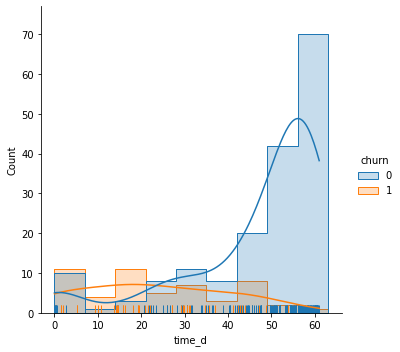

<seaborn.axisgrid.FacetGrid at 0x7f0f39704580>

In [0]:
# Time from registration in hours
df_mints = df.groupBy('userId').min('ts')
df_max_ts = df.groupBy('userId').max('ts')
df_time_since_reg = df_mints.join(df_max_ts, on='userId', how='left')
df_time_since_reg = df_time_since_reg.join(df_user.withColumnRenamed('max(churn_session)', 'churn'), on='userId', how='left')
df_time_since_reg = df_time_since_reg.withColumn('time_s', (col('max(ts)')-col('min(ts)'))/1000  )
df_time_since_reg = df_time_since_reg.withColumn('time_h', (col('max(ts)')-col('min(ts)'))/(1000*60*60))
df_time_since_reg = df_time_since_reg.withColumn('time_d', (col('max(ts)')-col('min(ts)'))/(1000*60*60*24))

# df_time_since_reg.show()

# Pandas dataframe and visualisation
df_time_since_reg_pd = df_time_since_reg.toPandas()
sns.displot(df_time_since_reg_pd, x="time_d", hue='churn', rug=True, element='step', kde=True, binwidth=7)

Most people leaving leaves in the first week or in week 3. Once a user passes 7 weeks with the service it is unlikely they'll leave

Out[62]:

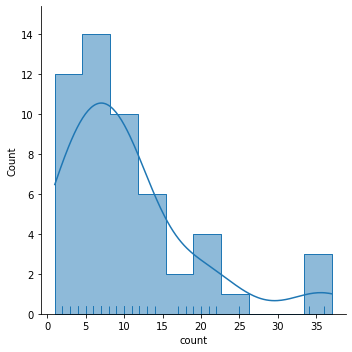

<seaborn.axisgrid.FacetGrid at 0x7f0f07886a00>

In [0]:
# Number of sessions before churning
df_no_of_sessions_to_churn = df_session.join(df_user.withColumnRenamed('max(churn_session)', 'churn_user'), on='userId', how='left').filter(col('churn_user')==1).sort('userId').groupBy('userId').count()
df_no_of_sessions_to_churn = df_no_of_sessions_to_churn.toPandas()
df_no_of_sessions_to_churn

sns.displot(df_no_of_sessions_to_churn, x="count", rug=True, element='step', kde=True);

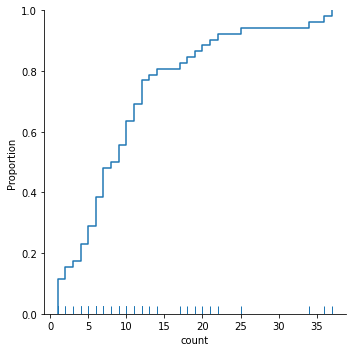

In [0]:
sns.displot(df_no_of_sessions_to_churn, x="count", rug=True, kind="ecdf");

Around 80% of users leaving leave within their first 15 session

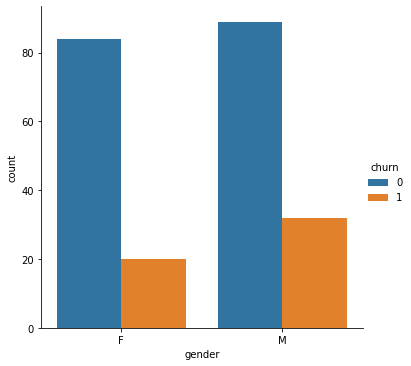

In [0]:
# gender churn vs no churn
df_gender = df.select(['userId', 'gender']).dropDuplicates() 

df_gender = df_gender.join(df_user.withColumnRenamed('max(churn_session)', 'churn'), on='userId', how='left')
df_gender_pd = df_gender.toPandas()

sns.catplot(data=df_gender_pd, x='gender', kind="count", hue='churn');

In [0]:
# State - check if a user travelled
df.select(['userId', 'state']).dropDuplicates().groupBy('userId').count().sort(col('count').desc()).agg({'count': 'max'}).show()

+----------+
max(count)|
+----------+
 1|
+----------+

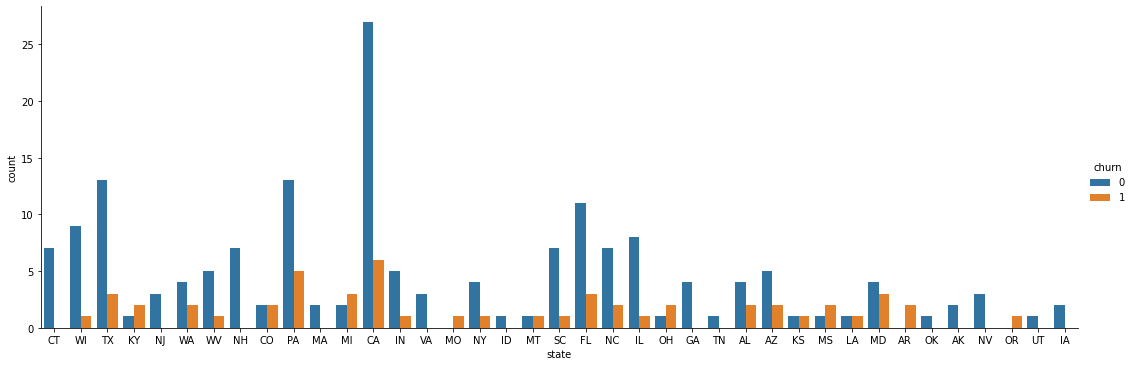

In [0]:
df_user_states = df.select(['userId', 'state']).dropDuplicates()

df_user_states = df_user_states.join(df_user.withColumnRenamed('max(churn_session)', 'churn'), on='userId', how='left')
df_user_states = df_user_states.toPandas()

sns.catplot(data=df_user_states, x='state', kind="count", hue='churn', aspect=3);

This plot isn't very helpful in seeing patterns accross states. However what relaly stand out is:
- Majority of usage is from California
- No churn in CT, NJ, NH, MA, VA, ID, TN, OK, AK, NV, UT, IA
- No retention in MO, AR and OR

In [0]:
# TODO: Maps
# - Total users
# - Churn %
# https://medium.com/@erikgreenj/mapping-us-states-with-geopandas-made-simple-d7b6e66fa20d

## Feature processing

TODO: map the location to timezones to get local time from timestamp
-  handle missing data in other cols
-  Feature engineering new cols
-  Scale
-  Encode Categorical F.

In [0]:
df.show(2)

The ts column is unix timestamp which is in UTC timezone. Let's try to convert this to a timezone-aware datetime object

In [0]:
# Extract the State
df = df.withColumn('state', substring(col("location"), -2, 2))

# unique list of states
df_states = df.select('state').dropDuplicates().sort('state').toPandas()
print(df_states.head(2), '\n')

# Get timezone name
df_states['tzName'] = df_states['state'].apply(lambda x: us_st.states.lookup(x).capital_tz)
print(df_states.head(2), '\n')

df_states = spark.createDataFrame(df_states)
print(df_states.show(2), '\n')

# Join time zone name
df = df.join(df_states, on='state', how='left')

# Convert utc timestamp (ms) to local date time
def get_local_datetime(ts, state):
    return datetime.datetime.utcfromtimestamp(ts/1000).astimezone(tz.gettz(state)).strftime('%Y-%m-%d %H:%M:%S')

get_tz_datetime = udf(get_local_datetime, StringType())

df = df.withColumn('dateTimeLocalTZ', get_tz_datetime(col('ts'), col('tzName')))
df.show(5)

In [0]:
get_hour = udf(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour, IntegerType())
df = df.withColumn('hour', get_hour(col('dateTimeLocalTZ')))

In [0]:
songs_in_hour = df.filter(df.page == "NextSong").groupby(df.hour).count().orderBy(df.hour.cast("float"))
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.bar(songs_in_hour_pd['hour'], height=songs_in_hour_pd['count'])

In [0]:
df.show()

In [0]:
cancel_in_hour = df.filter(df.cancel_conf == 1).groupby(df.hour).count().orderBy(df.hour.cast("float"))
cancel_in_hour_pd = cancel_in_hour.toPandas()
cancel_in_hour_pd.hour = pd.to_numeric(cancel_in_hour_pd.hour)

plt.bar(cancel_in_hour_pd['hour'], height=cancel_in_hour_pd['count'])

In [0]:
# turn timestamp to hour
# get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour)
# df = df.withColumn("hour", get_hour(df.ts))

In [0]:
df.show(5)

In [0]:
songs_in_hour = df.filter(df.page == "NextSong").groupby(df.hour).count().orderBy(df.hour.cast("float"))
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.bar(songs_in_hour_pd['hour'], height=songs_in_hour_pd['count'])

In [0]:
songs_in_hour = df.filter(df.page == 'Cancellation Confirmation').groupby(df.hour).count().orderBy(df.hour.cast("float"))
# songs_in_hour.show()
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.bar(songs_in_hour_pd['hour'], height=songs_in_hour_pd['count'])

In [0]:
df = df.withColumn("dateTime", from_unixtime(df.ts/1000))

In [0]:
df.show(2)

In [0]:
# df.select('location').dropDuplicates().sort('location').show(150, False)

In [0]:
# for state in df.select('state').dropDuplicates().sort('state').toPandas()['state']:
#     print(us_st.states.lookup(state).capital_tz)
    
# def get_state(state_code):
#     return us_st.states.lookup(state_code).capital_tz

In [0]:
# # get timezone info for the state
# get_tz = udf(get_state)
# df = df.withColumn('tz', get_tz(col('state')))
# # df.groupBy('tz').count().sort('count').show()

## 4. Modelling

4.1 Create a Pipeline